In [115]:
import glob
import os
import re
import random
import numpy as np
import pandas as pd
import math
from pathlib import Path
import matplotlib.pyplot as plt

import gensim
import pickle
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

In [116]:
os.chdir("D://Datasets")

In [3]:
corpus = []

for path in Path('All enron unzip').rglob('*.txt'):
        with open(path, errors='ignore') as f_input:
            corpus.append(f_input.read())

In [134]:
df = pd.DataFrame(corpus)
df.head()

,0
0,Legitimate\n----------\n- Owner: farmer-d\n- T...
1,Subject: christmas tree farm pictures\n
2,"Subject: vastar resources , inc .\ngary , prod..."
3,Subject: calpine daily gas nomination\n- calpi...
4,Subject: re : issue\nfyi - see note below - al...


In [135]:
len(df)

27721

In [136]:
df = df.drop([0,5173,11031,16544,21720]) # Removed the summary bits
df.columns=["E-mails"]

In [137]:
random.seed(a=5)
df = df.sample(frac=1)	# Shuffle the entire dataframe
ten_off_df = math.floor(len(df)/10)

In [138]:
#################[Failed FOR loop attempt]
# df_temp = df
# for i in range(1,9):
 #    locals()['df_{}.index.values'.format(i)] = df_temp.sample(ten_off_df)
 #    c_df = locals()['df_{}'.format(i)]
 #    locals()['l_{}'.format(i)] = list(c_df.index.values)
 #    loc_l = locals()['l_{}'.format(i)]
 #    df_temp = df_temp.drop(loc_l)

In [139]:
################# [Good For loop attempt]
df_temp = df
for i in range(0,9):
    a = df_temp.sample(ten_off_df)
    locals()['df_{}'.format(i)] = a
    l = list(a.index.values)
    df_temp = df_temp.drop(l)

In [140]:
df_test = df_temp

frames=[df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8]
df_train = pd.concat(frames)

In [141]:
len(df_train)+len(df_test)==len(df)	## Check if the split was properly done

True

In [142]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\axl_a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [145]:
df_test

,E-mails
21346,Subject: failure notice\nhi . this is the qmai...
6721,Subject: re : anita dupont resume\noooopppss !...
25652,"Subject: hey , its me , diehlmys 5644 from aim..."
17648,Subject: uk submission of positions\njust to f...
24535,Subject: = ? utf - 8 ? q ? each tablets at 0 ....
...,...
7412,Subject: research meeting\nall\njohn sherriff ...
13309,"Subject: tables report dated october 15 , 2001..."
18103,"Subject: when size does matter , you know wher..."
14260,Subject: latest commercial info\n- - - - - ori...


In [146]:
df_train

,E-mails
771,Subject: please re - map hpl zone 4 from a / s...
646,Subject: fw : special prayer request\n- - - - ...
1335,Subject: eastrans nomination changes effective...
25094,Subject: watch this micro - cap issue trade\nm...
8915,"Subject: eprm article\nhi vince ,\n?\ni ' m so..."
...,...
5904,"Subject: re : test\nshirley ,\nplease , remind..."
25578,Subject: response needed\ndear friend\ni am mr...
3922,Subject: absentminded volition cavil corpus de...
14250,Subject: 11 / 30 and 12 / 3 dpr - update\nwith...


In [147]:
df_0_ok = df_0[df_0['E-mails'].str.contains("re :") | df_0['E-mails'].str.contains("fw :")]
df_1_ok = df_1[df_1['E-mails'].str.contains("re :") | df_1['E-mails'].str.contains("fw :")]
df_2_ok = df_2[df_2['E-mails'].str.contains("re :") | df_2['E-mails'].str.contains("fw :")]
df_3_ok = df_3[df_3['E-mails'].str.contains("re :") | df_3['E-mails'].str.contains("fw :")]
df_4_ok = df_4[df_4['E-mails'].str.contains("re :") | df_4['E-mails'].str.contains("fw :")]
df_5_ok = df_5[df_5['E-mails'].str.contains("re :") | df_5['E-mails'].str.contains("fw :")]
df_6_ok = df_6[df_6['E-mails'].str.contains("re :") | df_6['E-mails'].str.contains("fw :")]
df_7_ok = df_7[df_7['E-mails'].str.contains("re :") | df_7['E-mails'].str.contains("fw :")]
df_8_ok = df_8[df_8['E-mails'].str.contains("re :") | df_8['E-mails'].str.contains("fw :")]
df_train_ok = df_train[df_train['E-mails'].str.contains("re :") | df_train['E-mails'].str.contains("fw :")]

In [148]:
df_0_ok

,E-mails
646,Subject: fw : special prayer request\n- - - - ...
27232,Subject: re : [ 5 ]\nthis is going to be our f...
25119,"Subject: re :\nwelcome to offshorepharm , your..."
12054,Subject: re : hello\ni am back in the office t...
4463,Subject: re : the hstoett lady sucklng huge cc...
...,...
8548,"Subject: re : vacation in march , april\nstins..."
12871,Subject: re : amendment to im ii ppa\ni would ...
17773,Subject: re : general alarm - - - enron metals...
9113,Subject: re : test\ndear vince : the email add...


In [149]:
for i in range(0,9):
    locals()['y_{}'.format(i)] = np.array([len(locals()['df_{}_ok'.format(i)]), len(locals()['df_{}'.format(i)]) - len(locals()['df_{}_ok'.format(i)])])

y=np.array([len(df_train_ok), len(df_train)-len(df_train_ok)])

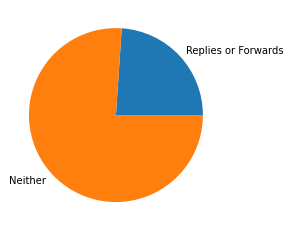

In [150]:
plt.pie(y, labels=["Replies or Forwards", "Neither"])
plt.show()

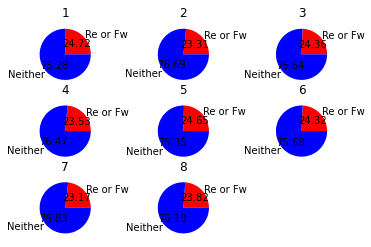

In [151]:
for i in range(1,9):
    plt.subplot(3,3,i)
    plt.pie(locals()['y_{}'.format(i)], labels=["Re or Fw", "Neither"], autopct = '%.2f', colors = ['red', 'blue']) 
    plt.title('{}'.format(i))
    
plt.show()    

In [152]:
l1 = stopwords.words('english')
lst1 = [' {} '.format(x) for x in l1]
lst1.append('Subject:')
lst1.append('Subject :')
lst1.remove(' re ')
# lst2 = [ '.{} '.format(x) for x in l1]
# lst3 = [ ' {}.'.format(x) for x in l1]

In [153]:
# Remove too common words from the list we procurred:
for i in range(0,9):
    locals()['df_{}'.format(i)]['E-mails'].replace(lst1, " ", regex=True, inplace=True)
    
   #  locals()['df_{}'.format(i)]['E-mails'].replace(lst2, " ", regex=True, inplace=True)
   #  locals()['df_{}'.format(i)]['E-mails'].replace(lst3, " ", regex=True, inplace=True)
df_train['E-mails'].replace(lst1, " ", regex=True, inplace=True)
df_test['E-mails'].replace(lst1, " ", regex=True, inplace=True)

In [154]:
# Remove punctuation and often used symbols, but NOT ':' since we'll need later
# "[?!.,;()"\/|&-`#$%^]"
for i in range(0,9):
    locals()['df_{}'.format(i)]['E-mails'].replace(r'[^\w\s]', " ", regex=True, inplace=True)
    
df_train['E-mails'].replace(r'[^\w\s]', " ", regex=True, inplace=True)
df_test['E-mails'].replace(r'[^\w\s]', " ", regex=True, inplace=True)

In [155]:
# Remove all numbers from the e-mails, as they're (mostly) redundant
# "[0-9999999999]"

for i in range(0,9):
    locals()['df_{}'.format(i)]['E-mails'].replace('[0-9999999999]', " ", regex=True, inplace=True)

df_train['E-mails'].replace('[0-9999999999]', " ", regex=True, inplace=True)
df_test['E-mails'].replace('[0-9999999999]', " ", regex=True, inplace=True)

In [156]:
df_train

,E-mails
771,please re map hpl zone east beaumont ...
646,fw special prayer request\n origi...
1335,eastrans nomination changes effective ...
25094,watch micro cap issue trade\nmoyer \nbefo...
8915,eprm article\nhi vince \n \ni sorry aro...
...,...
5904,re test\nshirley \nplease remind making...
25578,response needed\ndear friend\ni mr olsom b...
3922,absentminded volition cavil corpus deacon fo...
14250,dpr update\nwith events yes...


In [157]:
df_test

,E-mails
21346,failure notice\nhi qmail send program se...
6721,re anita dupont resume\noooopppss \npleas...
25652,hey diehlmys aim\nwould reflnance k...
17648,uk submission positions\njust follow james ...
24535,utf q tablets \n ut...
...,...
7412,research meeting\nall\njohn sherriff suggest...
13309,tables report dated october \nif wo...
18103,size matter know go \ndid know \nt...
14260,latest commercial info\n original m...


In [158]:
df_4

,E-mails
10051,cool medz\nhello welcome medzonli decapita...
26684,re ppharmacy nct\nhello want spend l...
23118,transcripts steve cooper voicemails\non ja...
13177,re ecp interest rate swap\nyes took ...
24011,xãnax here\nsa _ ord ering onl i...
...,...
15194,neglect prize \nfrom desk managin...
16089,consultation prize winner notice\npowerball ...
371,estimate file updates\ndave \nplease steve ...
14267,deal issues\nsome things ready \nplease for...


In [159]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [160]:
# nltk.download('wordnet')
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\axl_a\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [161]:
for i in range(0,9):
    locals()['df_{}_lem'.format(i)] = locals()['df_{}'.format(i)]['E-mails'].apply(lemmatize_text)

df_train_lem = df_train['E-mails'].apply(lemmatize_text)
df_test_lem = df_test['E-mails'].apply(lemmatize_text)

In [259]:
## All words used in df_1
for i in range(0,9):
    locals()['df{}'.format(i)] = locals()['df_{}'.format(i)].stack().str.split("[^\w+]").explode().tolist()

dftrain = df_train.stack().str.split("[^\w+]").explode().tolist()
## Ignore the warnings please

<>:3: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<ipython-input-259-2ce21cc39b79>:3: DeprecationWarning: invalid escape sequence \w
  locals()['df{}'.format(i)] = locals()['df_{}'.format(i)].stack().str.split("[^\w+]").explode().tolist()
<ipython-input-259-2ce21cc39b79>:5: DeprecationWarning: invalid escape sequence \w
  dftrain = df_train.stack().str.split("[^\w+]").explode().tolist()


In [262]:
## Remove the identings
for i in range(0,9):
    locals()['d{}'.format(i)]= list(filter(None, locals()['d{}'.format(i)])) # our 'bow'
    ## Remove fewer than 4 characters terms
    locals()['d{}'.format(i)] = [token for token in locals()['d{}'.format(i)] if len(token)>4]
    ## Read unique terms => dictionary
    locals()['d{}_u'.format(i)] = np.unique(locals()['d{}'.format(i)]) # our dictionary, finally!

dftrain = list(filter(None, dftrain))
dftrain = [token for token in dftrain if len(token)>4]
dftrain_u = np.unique(dftrain)

In [255]:
d5_u

array(['aabvmmq', 'aaghpdvvu', 'aagrra', ..., 'þettit', 'þeyin',
       'þöyledir'], dtype='<U24')

In [264]:
len(dftrain_u)

100589

In [34]:
def countX(lst, x): 
    return lst.count(x)

In [266]:
## WARNING: Immense runtime expected, ~ 1 hour 
v = np.zeros(len(dftrain))
i = 0
for x in dftrain_u:
    v[i] = countX(dftrain,x)
    i = i + 1

In [268]:
v ## Number of occurences of every element
len(v)

2620892

In [270]:
v1 = v/len(dftrain) 
	## This stores the term frequencies of all terms in dftrain
	## They're stored in indices corresponding to the indices of df1_u, i.e. v1[i] is the term frequency of term on the ith position in df1_u
sum(v1) # should be very, VERY close to 1

1.000000000000923

In [274]:
df_1_lem_list = df_1_lem.values.tolist()
df_1_lem_list[0:2]

[['call',
  'hello',
  'hot',
  'lil',
  'horny',
  'toy',
  'i',
  'one',
  'dream',
  'i',
  'open',
  'minded',
  'person',
  'love',
  'talk',
  'subject',
  'fantasy',
  'way',
  'life',
  'ultimate',
  'sex',
  'play',
  'ummmmmmmmmmmmmm',
  'i',
  'wet',
  'ready',
  'it',
  'look',
  'imagination',
  'matter',
  'with',
  'sexy',
  'voice',
  'make',
  'dream',
  'come',
  'true',
  'hurry',
  'call',
  'let',
  'cummmmm',
  'toll',
  'free',
  'teen',
  'for',
  'phone',
  'billing',
  'sign',
  'free',
  'personalized',
  'e',
  'mail',
  'mail',
  'com',
  'http',
  'www',
  'mail',
  'com',
  'sr',
  'signup'],
 ['enron',
  'hpl',
  'actuals',
  'july',
  'teco',
  'tap',
  'enron',
  'hpl',
  'iferc',
  'l',
  'hpl',
  'lsk',
  'ic',
  'enron']]

In [275]:
lister = [[] for x in range(len(df_1_lem))]
for i in range(len(df_1_lem_list)):
    l = df_1_lem_list[i]
    for token in l:
        if len(token)>4:
            lister[i].append(token)

lister[0:2]

[['hello',
  'horny',
  'dream',
  'minded',
  'person',
  'subject',
  'fantasy',
  'ultimate',
  'ummmmmmmmmmmmmm',
  'ready',
  'imagination',
  'matter',
  'voice',
  'dream',
  'hurry',
  'cummmmm',
  'phone',
  'billing',
  'personalized',
  'signup'],
 ['enron', 'actuals', 'enron', 'iferc', 'enron']]

In [176]:
dictionary = gensim.corpora.Dictionary(lister)

In [177]:
bow_corpus = [dictionary.doc2bow(doc) for doc in lister]

In [178]:
tfidf=gensim.models.TfidfModel(bow_corpus)
tfidf_corp = tfidf[bow_corpus]

In [278]:
bow_corpus[0:2]

[[(0, 1),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1)],
 [(19, 1), (20, 3), (21, 1)]]

In [205]:
lda_model_tfidf = gensim.models.LdaMulticore(tfidf_corp, num_topics=6, id2word=dictionary, passes=2, workers=4)

In [202]:
# !python -m pip install pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [203]:
lda_display = pyLDAvis.gensim.prepare(lda_model_tfidf, tfidf_corp, 
                                          dictionary, mds='mmds')
pyLDAvis.display(lda_display, template_type='notebook')

In [194]:
from gensim.models.coherencemodel import CoherenceModel
def getCoherence(m,t,d):
    coherence_model_lda = CoherenceModel(model=m,texts=t, dictionary=d, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return(coherence_lda) # Need high coherence

In [185]:
perplexity = lda_model_tfidf.log_perplexity(tfidf_corp) # Need low perplexity

In [199]:
perplexity

-11.18450272818756

In [206]:
getCoherence(m=lda_model_tfidf, t=lister, d =dictionary)

0.3254622928925399

In [208]:
gCH = [0] * 20
for i in range(1,20):
    locals()['lda_model_tfidf_{}'.format(i)] = gensim.models.LdaMulticore(tfidf_corp, num_topics=i, id2word=dictionary, passes=2, workers=4)

In [211]:
for i in range(1,20):
    gCH[i]=getCoherence(m=locals()['lda_model_tfidf_{}'.format(i)], t=lister, d =dictionary)

In [212]:
gCH

[0,
 0.3046639797205001,
 0.2826470786449432,
 0.29089393092560334,
 0.3156667655043869,
 0.35671059224410706,
 0.3415964487498513,
 0.327230236677002,
 0.3593646465638992,
 0.3248551440422413,
 0.3409905926804197,
 0.33560914689298293,
 0.33564492542214763,
 0.31756473207253805,
 0.3212423547461851,
 0.33763443663919995,
 0.3614819470636016,
 0.35697747804138935,
 0.34387060136093256,
 0.35421030695551936]

In [216]:
len(gCH)

20

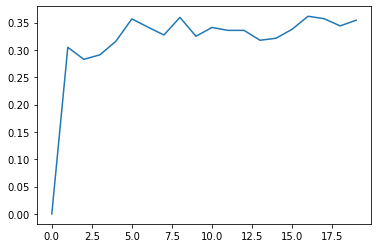

In [217]:
plt.plot(gCH)

In [229]:
print("The maximum number is", max(gCH), "and its corresponding number of topics is", np.argmax(gCH))

The maximum number is 0.3614819470636016 and its corresponding number of topics is 16


In [230]:
lda_display_good = pyLDAvis.gensim.prepare(lda_model_tfidf_16, tfidf_corp, 
                                          dictionary, mds='mmds')
pyLDAvis.display(lda_display_good, template_type='notebook')